In [2]:
!git clone https://github.com/JohnDoee/imdbparser.git

Cloning into 'imdbparser'...
remote: Enumerating objects: 295, done.
remote: Total 295 (delta 0), reused 0 (delta 0), pack-reused 295
Receiving objects: 100% (295/295), 56.91 KiB | 1.21 MiB/s, done.
Resolving deltas: 100% (176/176), done.


In [3]:
import json
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from tqdm import tqdm
from pathlib import Path
from imdbparser.imdbparser import IMDb

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Parsing

In [4]:
data_dir = Path("data")
if not data_dir.exists(): data_dir.mkdir()
imgs_dir = data_dir / "imgs"
if not imgs_dir.exists(): imgs_dir.mkdir()

In [5]:
genres = ["Action", "Adventure", "Animation", "Biography", "Comedy", "Crime", "Documentary", "Drama",
            "Family", "Fantasy", "Film-Noir", "History", "Horror", "Music", "Musical", "Mystery",
            "Romance", "Sci-Fi", "Short", "Sport", "Superhero", "Thriller", "War", "Western"]

if (data_dir / "movie_info.csv").exists():
    results = pd.read_csv(data_dir / "movie_info.csv")
    results["genres"] = results["genres"].map(lambda x: json.loads(x.replace("\'", "\"")))
    seen = set(results.imdb_id)
    results = results.to_dict("records")
else:
    results = []
    seen = set()

imdb = IMDb()

for genre in tqdm(genres):
    for year in tqdm(range(2015, 2023)):
        try:
            query = imdb.advanced_search(genres=[genre],  release_date=(year, year + 1))
            query.fetch()
            for movie in query.results:
                movie.imdb_id = movie.imdb_id.lstrip("t")
                if movie.imdb_id in seen: continue
                seen.add(movie.imdb_id)
                movie.fetch()

                results.append({"imdb_id": movie.imdb_id, "title": movie.title, "plot": movie.plot,
                                "genres": movie.genres})
                img_data = requests.get(movie.cover).content
                with open(imgs_dir / f"{movie.imdb_id}.jpg", 'wb') as handler:
                    handler.write(img_data)
        except Exception as e:
            print(e)

# exceptional genres
for year in tqdm(range(1950, 1959)):
    try:
        query = imdb.advanced_search(genres=["Film-Noir"],  release_date=(year, year + 1))
        query.fetch()
        for movie in query.results:
            movie.imdb_id = movie.imdb_id.lstrip("t")
            if movie.imdb_id in seen: continue
            seen.add(movie.imdb_id)
            movie.fetch()

            results.append({"imdb_id": movie.imdb_id, "title": movie.title, "plot": movie.plot,
                            "genres": (movie.genres if "Film-Noir" in movie.genres else movie.genres + ["Film-Noir"])})
            img_data = requests.get(movie.cover).content
            with open(imgs_dir / f"{movie.imdb_id}.jpg", 'wb') as handler:
                handler.write(img_data)
    except Exception as e:
        print(e)

for year in tqdm(range(2015, 2023)):
    try:
        query = imdb.advanced_search(keywords="Superhero",  release_date=(year, year + 1))
        query.fetch()
        for movie in query.results:
            movie.imdb_id = movie.imdb_id.lstrip("t")
            if movie.imdb_id in seen: 
                idx = 0
                while results[idx]["imdb_id"] != movie.imdb_id: idx += 1
                if "Superhero" not in results[idx]["genres"]:
                    results[idx]["genres"] += ["Superhero"]
                continue
            seen.add(movie.imdb_id)
            movie.fetch()

            results.append({"imdb_id": movie.imdb_id, "title": movie.title, "plot": movie.plot,
                            "genres": (movie.genres if "Superhero" in movie.genres else movie.genres + ["Superhero"])})
            img_data = requests.get(movie.cover).content
            with open(imgs_dir / f"{movie.imdb_id}.jpg", 'wb') as handler:
                handler.write(img_data)
    except Exception as e:
        print(e)

pd.DataFrame(results).to_csv(data_dir / "movie_info.csv", index=False)
len(results)

 62%|██████▎   | 5/8 [03:13<01:28, 29.34s/it]


 88%|████████▊ | 7/8 [04:08<00:25, 25.69s/it]


 29%|██▉       | 7/24 [31:41<1:10:37, 249.28s/it]


 75%|███████▌  | 6/8 [02:51<00:42, 21.15s/it]


 88%|████████▊ | 7/8 [02:51<00:14, 14.44s/it]


 25%|██▌       | 2/8 [01:01<02:33, 25.59s/it]


 38%|███▊      | 3/8 [01:02<01:10, 14.19s/it]


 50%|█████     | 4/8 [01:03<00:36,  9.02s/it]


 62%|██████▎   | 5/8 [01:04<00:17,  5.97s/it]


 88%|████████▊ | 7/8 [02:07<00:17, 17.28s/it]


100%|██████████| 24/24 [1:12:00<00:00, 180.04s/it]


 75%|███████▌  | 6/8 [01:17<00:19,  9.83s/it]

100%|██████████| 8/8 [01:42<00:00, 12.85s/it]


3150

# Explore

In [6]:
import pandas as pd
import json

In [ ]:
data_dir = Path("data")
movies_info = pd.read_csv(data_dir / "movie_info.csv")
movies_info["genres"] = movies_info["genres"].map(lambda x: json.loads(x.replace("\'", "\"")))
genres = ["Action", "Adventure", "Animation", "Biography", "Comedy", "Crime", "Documentary", "Drama",
            "Family", "Fantasy", "Film-Noir", "History", "Horror", "Music", "Musical", "Mystery",
            "Romance", "Sci-Fi", "Short", "Sport", "Superhero", "Thriller", "War", "Western"]



In [12]:
movies_info

,imdb_id,title,plot,genres
0,4179452,The Last Kingdom,"In the year 872, many of the separate kingdoms...","[Action, Drama, History]"
1,3748528,Rogue One,All looks lost for the Rebellion against the E...,"[Action, Adventure, Sci-Fi]"
2,5626028,Boku no hîrô akademia,"In a world populated with superhumans, the sup...","[Animation, Action, Adventure, Fantasy, Sci-Fi..."
3,3322312,Daredevil,As a child Matt Murdock was blinded by a chemi...,"[Action, Crime, Drama, Fantasy, Sci-Fi, Thrill..."
4,2580046,Miraculous: Tales of Ladybug & Cat Noir,"By daylight, Marinette Dupain-Cheng and Adrien...","[Animation, Action, Adventure, Family, Fantasy..."
...,...,...,...,...
3145,10090058,Satria Dewa: Gatotkaca,Realizing that he's the lineal descendant of G...,"[Action, Adventure, Drama, Fantasy, Sci-Fi, Su..."
3146,16389768,The Villains of Valley View,Havoc stands up against the leader of all vill...,"[Comedy, Family, Superhero]"
3147,16549788,The Guardians of Justice,NaN,"[Animation, Action, Adventure, Comedy, Mystery..."
3148,10737918,Shin Ultraman,The continued appearance of giant unidentified...,"[Action, Adventure, Drama, Fantasy, Sci-Fi, Su..."


We have some NaNs, let's filter them out

In [14]:
movies_info_with_plot = movies_info[movies_info['plot'].notnull()]
len(movies_info_with_plot)

2215

In [15]:
genres_count = dict.fromkeys(genres, 0)
unique_genres = set()
for _, row in movies_info_with_plot.iterrows():
    unique_genres |= set(row["genres"])
    for genre in genres_count:
        genres_count[genre] += genre in row["genres"]
print(unique_genres)
genres_count

{'Sport', 'Film-Noir', 'Mystery', 'Action', 'Sci-Fi', 'Musical', 'Romance', 'Short', 'Game-Show', 'Adventure', 'Family', 'Reality-TV', 'Western', 'Biography', 'Fantasy', 'History', 'Superhero', 'Music', 'Animation', 'Crime', 'Thriller', 'War', 'Drama', 'News', 'Documentary', 'Talk-Show', 'Comedy', 'Horror'}


{'Action': 569,
 'Adventure': 501,
 'Animation': 256,
 'Biography': 267,
 'Comedy': 605,
 'Crime': 507,
 'Documentary': 107,
 'Drama': 1435,
 'Family': 289,
 'Fantasy': 405,
 'Film-Noir': 245,
 'History': 222,
 'Horror': 251,
 'Music': 143,
 'Musical': 134,
 'Mystery': 338,
 'Romance': 362,
 'Sci-Fi': 335,
 'Short': 82,
 'Sport': 151,
 'Superhero': 165,
 'Thriller': 656,
 'War': 189,
 'Western': 77}

We need to increase the amount of examples on some genres

# Encore


In [27]:
genres_to_expand = [genre[0] for genre in genres_count.items() if genre[1] < 201]
genres_to_expand_numbers = [200 - genre[1] for genre in genres_count.items() if genre[1] < 201]
print([x for x in zip(genres_to_expand, genres_to_expand_numbers)])

[('Documentary', 93), ('Music', 57), ('Musical', 66), ('Short', 118), ('Sport', 49), ('Superhero', 35), ('War', 11), ('Western', 123)]


In [ ]:
genres = genres_to_expand

if (data_dir / "movie_info_extra.csv").exists():
    results = pd.read_csv(data_dir / "movie_info_extra.csv")
    results["genres"] = results["genres"].map(lambda x: json.loads(x.replace("\'", "\"")))
    seen = set(results.imdb_id)
    results = results.to_dict("records")
else:
    results = []
    seen = set()

imdb = IMDb()

for genre in tqdm(genres):
    for year in tqdm(range(2008, 2015)):
        try:
            query = imdb.advanced_search(genres=[genre],  release_date=(year, year + 1))
            query.fetch()
            for movie in query.results:
                movie.imdb_id = movie.imdb_id.lstrip("t")
                if movie.imdb_id in seen: continue
                seen.add(movie.imdb_id)
                movie.fetch()

                results.append({"imdb_id": movie.imdb_id, "title": movie.title, "plot": movie.plot,
                                "genres": movie.genres})
                img_data = requests.get(movie.cover).content
                with open(imgs_dir / f"{movie.imdb_id}.jpg", 'wb') as handler:
                    handler.write(img_data)
        except Exception as e:
            print(e)

for year in tqdm(range(2008, 2015)):
    try:
        query = imdb.advanced_search(keywords="Superhero",  release_date=(year, year + 1))
        query.fetch()
        for movie in query.results:
            movie.imdb_id = movie.imdb_id.lstrip("t")
            if movie.imdb_id in seen: 
                idx = 0
                while results[idx]["imdb_id"] != movie.imdb_id: idx += 1
                if "Superhero" not in results[idx]["genres"]:
                    results[idx]["genres"] += ["Superhero"]
                continue
            seen.add(movie.imdb_id)
            movie.fetch()

            results.append({"imdb_id": movie.imdb_id, "title": movie.title, "plot": movie.plot,
                            "genres": (movie.genres if "Superhero" in movie.genres else movie.genres + ["Superhero"])})
            img_data = requests.get(movie.cover).content
            with open(imgs_dir / f"{movie.imdb_id}.jpg", 'wb') as handler:
                handler.write(img_data)
    except Exception as e:
        print(e)

pd.DataFrame(results).to_csv(data_dir / "movie_info_extra.csv", index=False)
len(results)

# Check expansion numbers

In [29]:
movies_info_extra = pd.read_csv(data_dir / "movie_info_extra.csv")
movies_info_extra["genres"] = movies_info_extra["genres"].map(lambda x: json.loads(x.replace("\'", "\"")))

movies_info_extra_with_plot = movies_info_extra[movies_info_extra['plot'].notnull()]
len(movies_info_extra_with_plot)

1179

In [30]:
genres_count = dict.fromkeys(genres, 0)
unique_genres = set()
for _, row in movies_info_extra_with_plot.iterrows():
    unique_genres |= set(row["genres"])
    for genre in genres_count:
        genres_count[genre] += genre in row["genres"]

print("Was needed:")
print(print([x for x in zip(genres_to_expand, genres_to_expand_numbers)]))
print("Result of expansion:")
print(unique_genres)
print(genres_count)


Was needed:
[('Documentary', 93), ('Music', 57), ('Musical', 66), ('Short', 118), ('Sport', 49), ('Superhero', 35), ('War', 11), ('Western', 123)]
None
Result of expansion:
{'Sport', 'Mystery', 'Action', 'Musical', 'Sci-Fi', 'Romance', 'Short', 'Game-Show', 'Adventure', 'Family', 'Reality-TV', 'Western', 'Biography', 'Fantasy', 'History', 'Music', 'Superhero', 'Animation', 'Crime', 'War', 'Thriller', 'Drama', 'News', 'Documentary', 'Talk-Show', 'Comedy', 'Horror'}
{'Documentary': 105, 'Music': 171, 'Musical': 137, 'Short': 79, 'Sport': 158, 'Superhero': 169, 'War': 176, 'Western': 143}


# OK MORE SHORTS
we need 40 more pages with shorts

In [31]:
genres = ['Short']

if (data_dir / "movie_info_shorts.csv").exists():
    results = pd.read_csv(data_dir / "movie_info_shorts.csv")
    results["genres"] = results["genres"].map(lambda x: json.loads(x.replace("\'", "\"")))
    seen = set(results.imdb_id)
    results = results.to_dict("records")
else:
    results = []
    seen = set()

imdb = IMDb()

for genre in tqdm(genres):
    for year in tqdm(range(2000, 2008)):
        try:
            query = imdb.advanced_search(genres=[genre],  release_date=(year, year + 1))
            query.fetch()
            for movie in query.results:
                movie.imdb_id = movie.imdb_id.lstrip("t")
                if movie.imdb_id in seen: continue
                seen.add(movie.imdb_id)
                movie.fetch()

                results.append({"imdb_id": movie.imdb_id, "title": movie.title, "plot": movie.plot,
                                "genres": movie.genres})
                img_data = requests.get(movie.cover).content
                with open(imgs_dir / f"{movie.imdb_id}.jpg", 'wb') as handler:
                    handler.write(img_data)
        except Exception as e:
            print(e)

pd.DataFrame(results).to_csv(data_dir / "movie_info_shorts.csv", index=False)
len(results)

 12%|█▎        | 1/8 [00:01<00:11,  1.59s/it]


100%|██████████| 1/1 [04:59<00:00, 299.60s/it]


215

In [32]:
movies_info_shorts = pd.read_csv(data_dir / "movie_info_shorts.csv")
movies_info_shorts["genres"] = movies_info_shorts["genres"].map(lambda x: json.loads(x.replace("\'", "\"")))

movies_info_shorts_with_plot = movies_info_shorts[movies_info_shorts['plot'].notnull()]
len(movies_info_shorts_with_plot)

109

# Unite & visualize!

In [79]:
movies_info_final = pd.concat([movies_info_with_plot,
                               movies_info_extra_with_plot, 
                               movies_info_shorts_with_plot]).reset_index()
movies_info_final[movies_info_final["imdb_id"] == 48190]

,index,imdb_id,title,plot,genres
2085,2990,48190,I Died a Thousand Times,"Aging bank robber Roy ""Mad Dog"" Earle is pardo...","[Crime, Drama, Film-Noir, Thriller]"


In [34]:
len(movies_info_final)

3503

In [55]:
genres = ["Action", "Adventure", "Animation", "Biography", "Comedy", "Crime", "Documentary", "Drama",
            "Family", "Fantasy", "Film-Noir", "History", "Horror", "Music", "Musical", "Mystery",
            "Romance", "Sci-Fi", "Short", "Sport", "Superhero", "Thriller", "War", "Western"]

genres_count = dict.fromkeys(genres, 0)
unique_genres = set()
for _, row in movies_info_final.iterrows():
    unique_genres |= set(row["genres"])
    for genre in genres_count:
        genres_count[genre] += genre in row["genres"]

print(f"Total genres: {len(genres_count.keys())}")
print(f"Total pages: {len(movies_info_final)}")
genres_count

Total genres: 24
Total pages: 3503


{'Action': 939,
 'Adventure': 799,
 'Animation': 460,
 'Biography': 380,
 'Comedy': 1040,
 'Crime': 662,
 'Documentary': 216,
 'Drama': 2125,
 'Family': 512,
 'Fantasy': 597,
 'Film-Noir': 245,
 'History': 340,
 'Horror': 333,
 'Music': 318,
 'Musical': 275,
 'Mystery': 437,
 'Romance': 579,
 'Sci-Fi': 552,
 'Short': 270,
 'Sport': 310,
 'Superhero': 334,
 'Thriller': 867,
 'War': 367,
 'Western': 222}

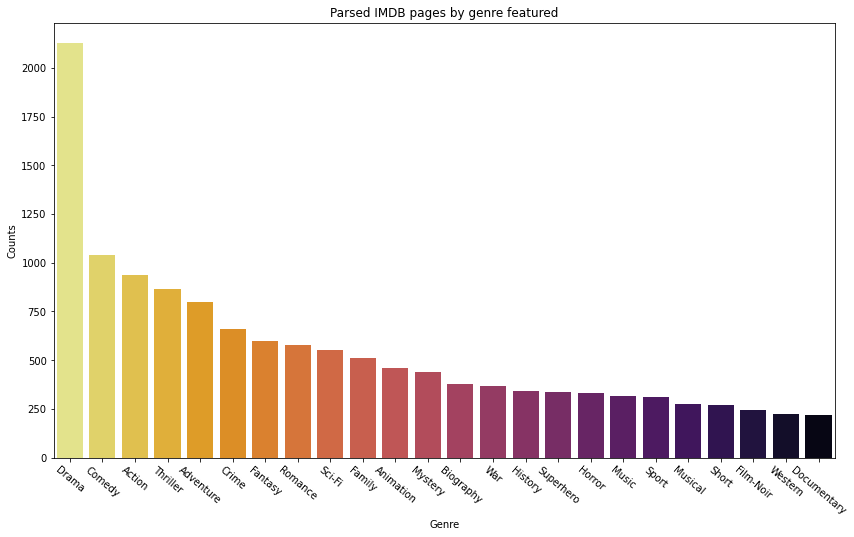

In [52]:
genre_list = np.array(list(genres_count.keys()))
genre_counts = np.array(list(genres_count.values()))

pd_df = pd.DataFrame({'Genre': genre_list, 'Counts': genre_counts})

pd_df = pd_df.sort_values('Counts', ascending = False)

fig, ax = plt.subplots(figsize=(14, 8))

sns.barplot(x='Genre',
            y='Counts',
            data=pd_df,
            order=pd_df['Genre'],
            palette = 'inferno_r',
            ax=ax)
plt.xticks(rotation=-40)
plt.title("Parsed IMDB pages by genre featured")
plt.show()

In [58]:
movies_info_final.to_csv(data_dir / "movie_info_final.csv", index=False)

In [73]:
movies_info_final_copy = pd.read_csv(data_dir / "movie_info_final.csv")
movies_info_final_copy

,index,imdb_id,title,plot,genres
0,0,4179452,The Last Kingdom,"In the year 872, many of the separate kingdoms...","['Action', 'Drama', 'History']"
1,1,3748528,Rogue One,All looks lost for the Rebellion against the E...,"['Action', 'Adventure', 'Sci-Fi']"
2,2,5626028,Boku no hîrô akademia,"In a world populated with superhumans, the sup...","['Animation', 'Action', 'Adventure', 'Fantasy'..."
3,3,3322312,Daredevil,As a child Matt Murdock was blinded by a chemi...,"['Action', 'Crime', 'Drama', 'Fantasy', 'Sci-F..."
4,4,2580046,Miraculous: Tales of Ladybug & Cat Noir,"By daylight, Marinette Dupain-Cheng and Adrien...","['Animation', 'Action', 'Adventure', 'Family',..."
...,...,...,...,...,...
3498,207,1385817,Anyone But Me,When 16 year old Vivian McMillan has to move f...,"['Short', 'Comedy', 'Drama']"
3499,208,1253563,Smáfuglar,2 Birds takes place during one bright summer n...,"['Short', 'Drama']"
3500,211,1255891,Next Floor,"Around a long and ponderous dining table, befo...","['Short', 'Comedy']"
3501,212,1295053,AM1200,Cocky investment analyst Sam Larson (raised in...,"['Short', 'Horror']"


# Time to save the pictures

In [69]:
import os
import sys
from google.colab import drive

drive.mount('/content/gdrive')
gdrive_path = r'/content/gdrive/My Drive'
drive_path = r'/content/My_Drive'
os.symlink(gdrive_path, drive_path)
sys.path.insert(0, drive_path)
print('Working Google Drive Path:', drive_path)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


FileExistsError: ignored

In [72]:
#@title Input directory and unit of measurement

# Credit:
# https://stackoverflow.com/a/1392549

def get_size(start_path = '.', unit='MB'):
    total_size = 0
    for dirpath, dirnames, filenames in os.walk(start_path):
        for f in filenames:
            fp = os.path.join(dirpath, f)
            # skip if it is symbolic link
            if not os.path.islink(fp):
                total_size += os.path.getsize(fp)

    if unit == 'MB':
      total_size *= 1e-6
    elif unit == 'GB':
      total_size *= 1e-9
    elif unit == 'TB':
      total_size *= 1e-12

    return total_size

def get_count(start_path = '.'):
    total_count = 0
    for dirpath, dirnames, filenames in os.walk(start_path):
        for f in filenames:
            fp = os.path.join(dirpath, f)
            # skip if it is symbolic link
            if not os.path.islink(fp):
                total_count += 1
    
    return total_count

target_dir = '/content/My_Drive/PAPI_NASONOV/lab2/pics' #@param {type: 'string'}
output_unit = 'GB' #@param ['MB', 'GB', 'TB']

dir_size = round(get_size(target_dir, output_unit), 2)
dir_count = get_count(target_dir)
print('Target directory:', target_dir)
print('Directory size is', dir_size, output_unit)
print('Directory file count:', dir_count)

Target directory: /content/My_Drive/PAPI_NASONOV/lab2/pics
Directory size is 6.19 GB
Directory file count: 4781


In [56]:
path_from = "/content/data/imgs"
path_to = "/content/My_Drive/PAPI NASONOV/lab2/pics"

In [70]:
!mv /content/data/imgs /content/My_Drive/PAPI_NASONOV/lab2/pics